# Essentials of Film Production Industry

# 1. Business Understanding 


# 1.1 Introduction
The film industry has grown over time and has recently become a key hub of innovation and investment. According to [grandviewresearch]( https://www.grandviewresearch.com/industry-analysis/movies-entertainment-market) the world market value of entertainment and movies is estimated at USD 90.92 billion as at 2021 and further expected to grow at a rate of 7.2% annually up to 2030. Several factors can be attributed to the rising trend of the growth of this sector. Some of them include; an increase in the propensity to buy leisure general increase in population, and disposable incomes. 
The target market for movie productions is teenagers and middle-age adults aged 18 to 39. Regarding demographics, North America has dominated the market as per the 2021 report by [grandviewresearch]( https://www.grandviewresearch.com/industry-analysis/movies-entertainment-market). Moreover, it is suitable for Microsoft to note other significant players in film production in the world, such as CBS Corporation and CBS Broadcasting Inc, Disney, Sony Corporation, 21st Century Fox, and Viacom Inc. to mention but a few. 
According to [Box OfficeMojo](https://www.boxofficemojo.com/year/world/?sort=rank&sortDir=asc&ref_=bo_ydw__resort#table) some of the best-performing movies worldwide are The Super Mario Bros. Movie, Guardians of the Galaxy vol. 3, Ant-Man and the Wasp: Quantomania, John Wick: Chapter 4 and Fast X. 
The intended beneficiary of this work is the Microsoft Company Movie Studio which wants to start engaging in Movie Production Business. Still, the Management needs to gain the requisite knowledge in the field. My client (Microsoft Movie Studio) will benefit from the insights brought out by the data analysis I will perform, as well as the recommendations resulting from the results and findings of the study.

# 1.2 Problem Statement 
The movie production business is generally very competitive, capital-intensive, and quite dynamic since its dependent on the preferences of those being entertained. Consequently, Microsoft Movie Studio is faced with the challenge of knowing the budget estimates for venturing into the business, the best-selling movie genres, the venture's return on investment, and other strategies to ensure its investment is successful. 
This research aims to study the trends in the box office and give valuable insights that will help the Management of the new Microsoft Movie studio. Through statistical analysis, I identify the film genres that are doing well in the market, and best-selling movie themes, highlight audience demographics, analyze market demand, and identify key competitors in the sector. 


 # 2. Data Understanding

The dataset used in this project has been extracted from various movie webistes. The specific sites are; [The Numbers](https://www.the-numbers.com), [The Movie DB](https://www.themoviedb.org), [Rotten Tomatoes](https://www.rottentomatoes.com/) [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/).I have further created the following paths to the essential dataframes for easy analysis. The file paths are: 'Project data/tn.movie_budgets.csv', 'Project data/tmdb.movies.csv', 'Project data/title.basics.csv' and 'Project data/title.ratings.csv'. 
The first dataset contains budgets of various movie series and their gross returns both locally and worldwide.It has 5782 rows and 5 columns. The other datasets contains movie genres, movie Ids, number of votes, ratings, runtime in minutes and they can be compiled to yield a crucial statistical outcomes as explained in the analysis part. 

# 3. Data Analysis

## 3.1 Importing relevant python libraries

In [2]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Reading the data
 

In [3]:
df = pd.read_csv('Project data/tn.movie_budgets.csv', index_col=0)
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## 3.2 Analysing Return on Investment of movies

After reading the data and viewing the first five rows and all columns I discover that it is demonstarting different types of movies, their production budget, domestic and worldwide gross profit in US Dollars. I will therefore proceed and analyse which movies have the highest return on investment. 

Calculating the Return on Investment(ROI)
We first deop the $ sign and then write code for getting the return on investment (ROI) for both domestic and worldwide markets. 

In [45]:
# Converting currency columns from string to numeric values by dropping the $ sign. 
df['production_budget'] = df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df['worldwide_gross'] = df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
# Calculating ROI per movie
df['ROI_domestic'] = (df['domestic_gross'] - df['production_budget']) / df['production_budget'] * 100
df['ROI_worldwide'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget'] * 100

# Display the calculated ROI for each movie
print(df[['movie', 'ROI_domestic', 'ROI_worldwide']])

                                          movie  ROI_domestic  ROI_worldwide
id                                                                          
1                                        Avatar     78.942971     553.257713
2   Pirates of the Caribbean: On Stranger Tides    -41.289850     154.667286
3                                  Dark Phoenix    -87.782186     -57.210757
4                       Avengers: Age of Ultron     38.840250     324.384139
5             Star Wars Ep. VIII: The Last Jedi     95.640815     315.369636
..                                          ...           ...            ...
78                                       Red 11   -100.000000    -100.000000
79                                    Following    708.033333    3908.250000
80                Return to the Land of Wonders    -73.240000     -73.240000
81                         A Plague So Pleasant   -100.000000    -100.000000
82                            My Date With Drew  16358.272727   16358.272727

We now rank the movies from the one with the highest ROI to the one with the least. 

In [46]:
# Rank movies based on ROI
df = df.sort_values(by='ROI_worldwide', ascending=False)

# Display the ranked movies with best ROI
ranked_movies = df[['movie', 'ROI_domestic', 'ROI_worldwide']]
print(ranked_movies)

                                movie   ROI_domestic  ROI_worldwide
id                                                                 
46                        Deep Throat  179900.000000  179900.000000
14                            Mad Max    4275.000000   49775.000000
93                Paranormal Activity   23881.957778   43051.785333
80                        The Gallows   22664.410000   41556.474000
7             The Blair Witch Project   23323.183167   41283.333333
..                                ...            ...            ...
23                           Pancakes    -100.000000    -100.000000
22                            Show Me    -100.000000    -100.000000
21            My Beautiful Laundrette    -100.000000    -100.000000
17                          Checkmate    -100.000000    -100.000000
83  No Man's Land: The Rise of Reeker    -100.000000    -100.000000

[5782 rows x 3 columns]


Text(0.5, 1.0, 'Domestic versus Worldwide Return on Investment (ROI)')

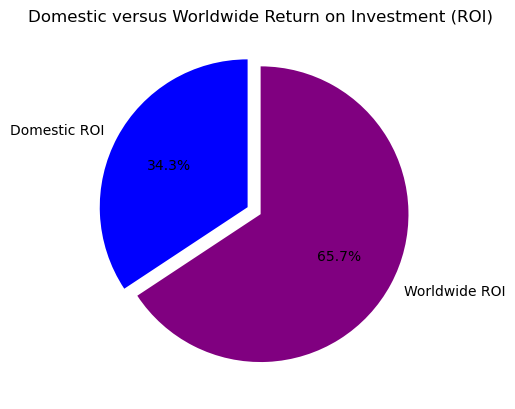

In [47]:
#getting total gross for both domestic and worldwide
total_domestic_gross = sum(ranked_movies["ROI_domestic"])
total_worldwide_gross = sum(ranked_movies["ROI_worldwide"])

# Calculate percentage of each gross
domestic_percent = (total_domestic_gross / (total_domestic_gross + total_worldwide_gross)) * 100
worldwide_percent = (total_worldwide_gross / (total_domestic_gross + total_worldwide_gross)) * 100

# Pie chart data
labels = ["Domestic ROI", "Worldwide ROI"]
sizes = [domestic_percent, worldwide_percent]
colors = ["blue", "purple"]
explode = (0.1, 0)  # Explode the first slice (Domestic Gross)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title("Domestic versus Worldwide Return on Investment (ROI)")


From the pie chart it can be seen that worldwide Return on investment is too large compared to domestic Return on Investment. 

# 3.3 Analysing average Budget and Return of movies

In [48]:
# Converting currency columns from string to numeric values by dropping the $ sign. 
df['production_budget'] = df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df['worldwide_gross'] = df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
# Calculate the average or mean
average_production_budget = df['production_budget'].mean()
average_domestic_gross = df['domestic_gross'].mean()
average_worldwide_gross = df['worldwide_gross'].mean()

# Print the results
print("Average Production Budget:", average_production_budget)
print("Average Domestic Gross:", average_domestic_gross)
print("Average Worldwide Gross:", average_worldwide_gross)

Average Production Budget: 31587757.0965064
Average Domestic Gross: 41873326.867001034
Average Worldwide Gross: 91487460.90643376


From the means above, the average product budget is 31,587,757 dollars per movie while domestic and worldwide gross return is 41,873,326 and 91,487,460 dollars respectively. 

In [6]:
df = pd.read_csv('Project data/tmdb.movies.csv', index_col=0)
df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


# 3.4 Investigating popular genre

In [9]:
# Convert the 'popularity' column to a numeric data type
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Sort the DataFrame by popularity in descending order
df = df.sort_values('popularity', ascending=False)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Print the transformed DataFrame
df.head()



,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


Based on popularity, the highly ranked movies are mostly  <b>Action Movies</b> like Avengers: Infinity War, John Wick and Spider-Man: Into the Spider-Verse.

In [52]:
df = pd.read_csv('Project data/title.basics.csv', index_col=0)
df.head(10)


,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"


In [53]:
df = pd.read_csv('Project data/title.ratings.csv', index_col=0)
df.head()


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [54]:
# Load the first table into a DataFrame
df1 = pd.read_csv('Project data/title.basics.csv', index_col='tconst')

# Load the second table into a DataFrame
df2 = pd.read_csv('Project data/title.ratings.csv', index_col='tconst')

# Perform an inner join on the common column "tconst"
joined_df = df1.merge(df2, left_index=True, right_index=True)

# Print the joined DataFrame
joined_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [141]:
# Split the 'genres' column into separate genre columns
genres_columns = joined_df['genres'].str.get_dummies(',')

# Concatenate the genre columns with the original DataFrame
df = pd.concat([joined_df, genres_columns], axis=1)

# Print the updated DataFrame
df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# View the column headers
column_heads = df.columns
# Print the column headers
print(column_heads)

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


# 3.5 Genre frequency

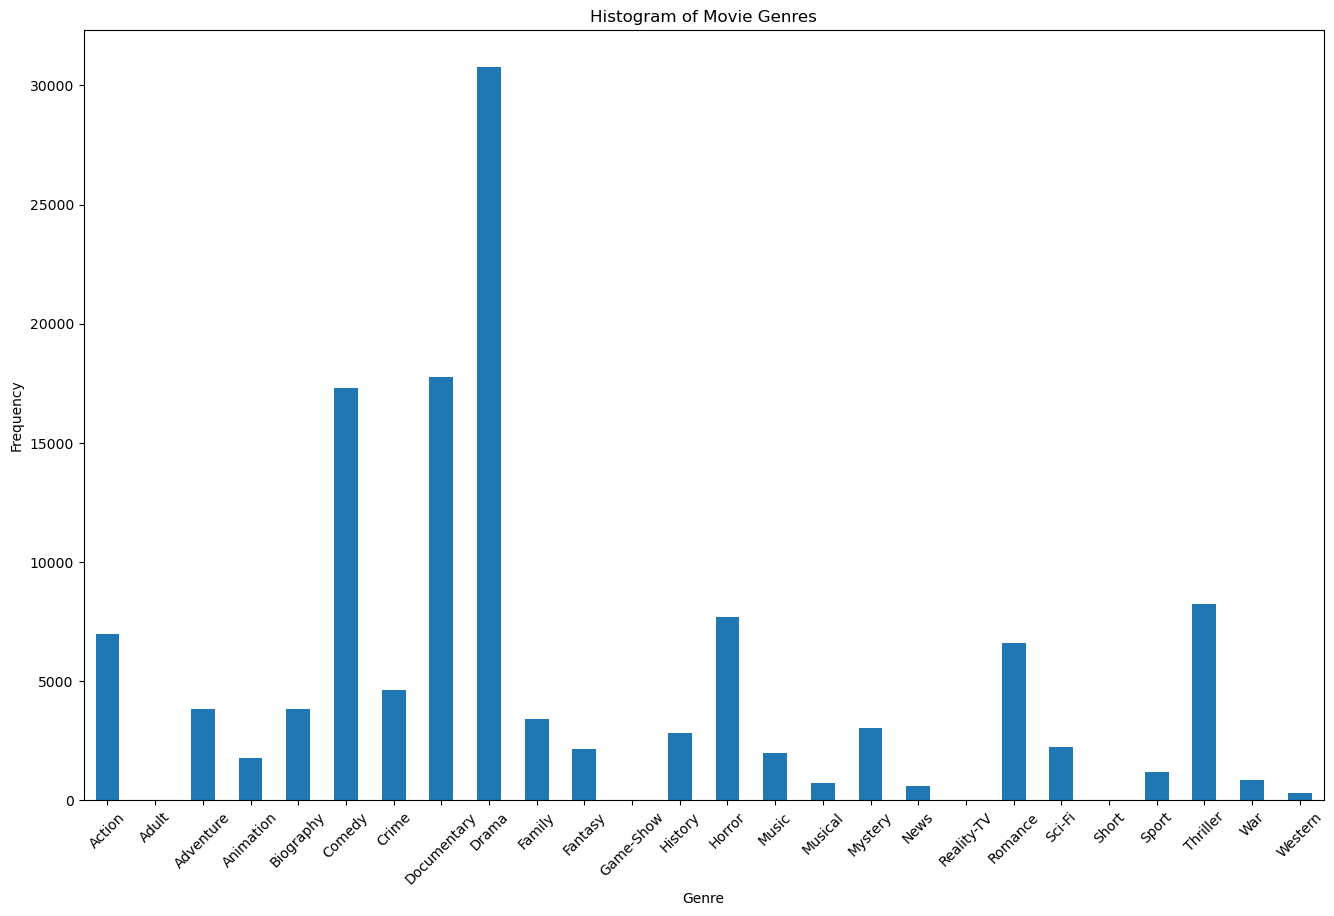

In [79]:
# Calculate the sum of each genre
genre_counts = df.iloc[:, 7:].sum()

# Create a histogram of genre 
plt.figure(figsize=(16, 10))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Genres')
plt.xticks(rotation=45)
plt.show()

The above histogram illustrates that the most watched movie genres are <b>Drama, Documentary and Comedy.<b/>

# 3.6 Average Rating of the Movies

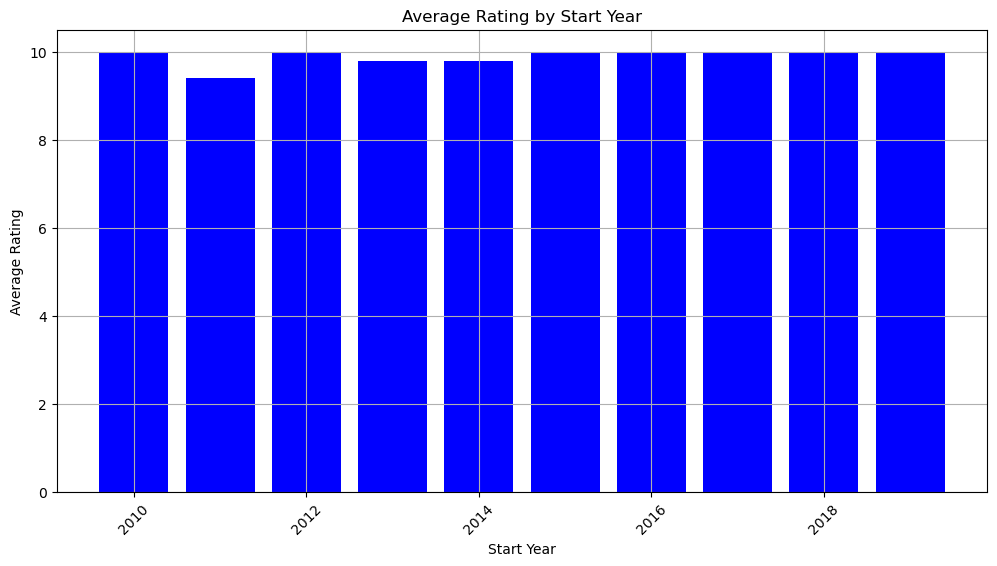

In [139]:
# Extract the start year and average rating columns
start_year = df['start_year']
average_rating = df['averagerating']

# Create a bar plot for start year and average rating
plt.figure(figsize=(12, 6))
plt.bar(start_year, average_rating, color='b')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Start Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The above trend implies that different movies have being rated very well over the years and thus it is an ideal business to venture in. 

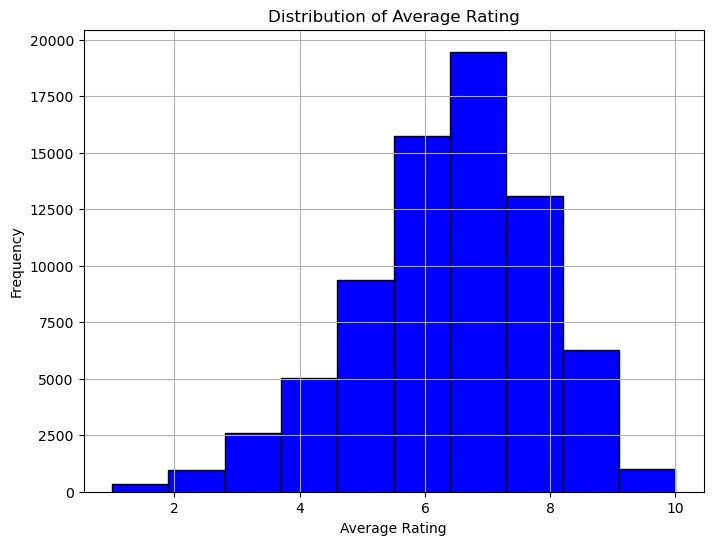

In [142]:
# Extract the averagerating column
averagerating = df['averagerating']

# Create a histogram of averagerating
plt.figure(figsize=(8, 6))
plt.hist(averagerating, bins=10, color='b', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating')
plt.grid(True)
plt.show()

In [144]:
mean_runtime = df['runtime_minutes'].mean()
mean_rating = df['averagerating'].mean()

print("Average Runtime: ", mean_runtime)
print("Average Rating: ", mean_rating)

Average Runtime:  94.6540400990398
Average Rating:  6.332728552859619


The average runtime ins about 95 minutes based on the data. So this could be a good benchmark for Micrososft Movie studio to determine the length of their films. In addition, the average rating of the movies given in the data set is 6.33 out of 10 which is above the average meaning that the market is interested with the movies and thus the Microsoft Movie studio can venture into the fun. 

## 4. Conclusion and Recommendations

<b> 4.1 Conclusion<b/>

The best selling and highly watched movies are Action Movies/Superhero, Documentary,Comedy and Drama movies. These are the most popular movies with based on the analysis done. Moreover, the movie market is seen to be huge and the return on the investment exciting. Microsoft movie studio should focus on movies which are able to be sold worldwide by selecting interesting themes and translating the movies in different languages to ensure they can be watched by everyone. Microsoft Movie studio should consider producing movies which are about one and half hours since its the average length of other movies in the market. Further studies indicate that the largest population which watches the movies are the young people and you adults aged 18 to 38 years and thus the content produced should be relevant to them. 

<b>4.2 Recommendations<b/>

1. Microssoft Movie Studio should deal in diverse movie genres. The top genres identified from this study include; Drama, Action Movies/Superhero, Documentary,Comedy movies. These are the genres with great potential and thus the company should focus in them.
2. I recommend Microsoft Movie studio to produce movies toching on global themes since the study has indicated that the highest retun on investment is on worldwide market and not only at the domestic market. Microsoft movie studio should ensure that all movies produced are well interpreted and marketed through other Microsoft Inc. platforms.
3. Microsoft Movie studio should do audience segmentation. From the ratings histogram we have discovered that different reviews were given to different customer preferences. To improve on the overall ratings of their movies, the company should ensure that movies for various age groups, social classes, cultures among other considerations are produced based on demand. Microsoft movie studion can collaborate with some experts in various types of movies to ensure they make quality films to the audience. 